# Pruebas del Particle Swarm Optimization
## David Omar Paredes Paredes y Abraham Maximiliano Ávalos Corrales

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import PSO               as ps

from BetaShF import ShF
from BetaShM import ShM

In [2]:
def single_objective_func(x, alpha:float=0.5):
	return alpha*ShF(x) + (1-alpha)*ShM(x)

bounds = np.array(
	[
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04],
		[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04]
	]
)

In [3]:
N_TESTS = 5

best = np.zeros((N_TESTS, 15))

for i, alpha in enumerate(np.arange(0.0, 1.0, 1.0/N_TESTS)):
	pso = ps.ParticleSwarmOptimization(
		single_objective_func,
		bounds,
		function_args=(alpha,),
		pop_size=45, max_it=80,
		min_vel=0.001, max_vel=0.02
	)
	print(f'Test {i+1}', end=' ')
	best[i] = pso.optimize()
	print('finished!')
print(best[:5])

Test 1 finished!
Test 2 finished!
Test 3 finished!
Test 4 finished!
Test 5 finished!
[[-1.30726291e-02 -3.54921525e-02  4.00000000e-02 -3.13240339e-02
   1.23938276e-01  4.00000000e-02 -6.26530845e-02  1.70897957e-02
   4.00000000e-02 -1.15787269e-03  8.34804722e-04  4.00000000e-02
   3.21064888e-03 -9.83199824e-04  2.27796134e-02]
 [ 4.28776903e-03  2.77137058e-03  3.01656899e-02  6.42700855e-03
   3.49590074e-02  4.00000000e-02 -9.98760653e-02  3.79342421e-02
   5.00000000e-03 -2.37893768e-02 -8.08065432e-03  5.00000000e-03
   9.28799055e-04  1.39900485e-04  5.00000000e-03]
 [ 1.50749818e-04  8.30155788e-04  4.00000000e-02  1.82739614e-04
  -1.95653936e-02  4.00000000e-02 -5.75861698e-02  5.77514561e-03
   4.00000000e-02  4.24280499e-05  2.30093331e-04  4.00000000e-02
  -3.87612253e-04 -4.25582066e-04  4.00000000e-02]
 [-7.42736034e-04  1.53980667e-04  4.00000000e-02  2.71976637e-03
   8.82826381e-03  4.00000000e-02 -5.27341557e-02 -1.43601861e-02
   4.00000000e-02  1.70906981e-04  1

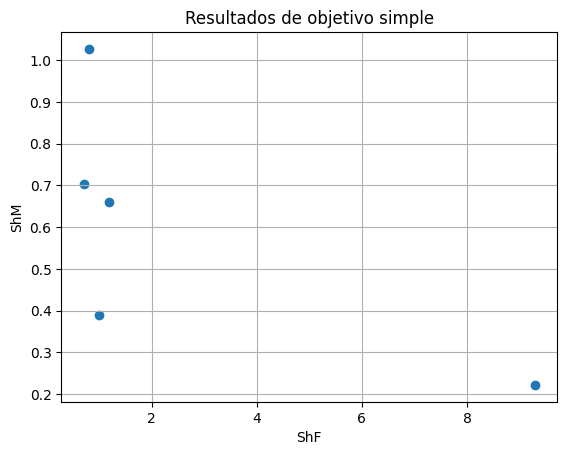

In [4]:
X = np.zeros((N_TESTS))
Y = np.zeros((N_TESTS))

for i in range(N_TESTS):
	X[i] = ShF(best[i])
	Y[i] = ShM(best[i])

fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

plt.title('Resultados de objetivo simple')
# plt.axis('equal')
plt.xlabel('ShF')
plt.ylabel('ShM')

plt.scatter(X, Y)

plt.grid(True)
plt.show()

In [5]:
pso_ntar = ps.MultiObjectiveParticleSwarmOptimization(
	[ShF, ShM], bounds, [(), ()],
	pop_size=50, max_it=400,
	min_vel=0.001, max_vel=0.02
)

best_ntar = np.array(pso_ntar.optimize())
print(best_ntar[:,5])

[0.03683074 0.03543525 0.03522578 0.03567568]


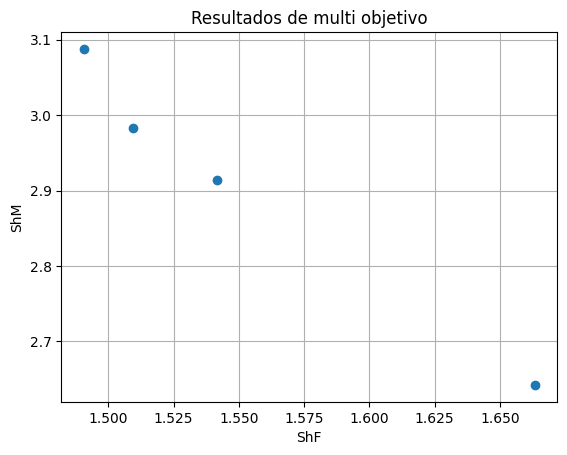

In [6]:
N_BEST = len(best_ntar)
X = np.zeros((N_BEST))
Y = np.zeros((N_BEST))

for i in range(N_BEST):
	X[i] = ShF(best_ntar[i])
	Y[i] = ShM(best_ntar[i])

plt.title('Resultados de multi objetivo')
# plt.axis('equal')
plt.xlabel('ShF')
plt.ylabel('ShM')

plt.scatter(X, Y)

plt.grid(True)
plt.show()